# Digit recognizer

In [196]:
### Importing libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
from time import time
tf.logging.set_verbosity(tf.logging.ERROR)

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [228]:
### Importing MNIST dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [271]:
### Splitting the training data
evl=train.iloc[0:4000,:]
evl2=train.iloc[4000:5000,:]

### Splitting labels and features
evl_l=evl["label"]
evl_f=evl.iloc[:,1:]

evl2_l=evl2["label"]
evl2_f=evl2.iloc[:,1:]

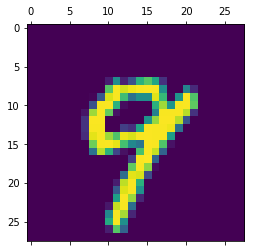

In [199]:
### Showing random example
random=np.random.randint(len(evl_f)-1)
_, ax = plt.subplots()
ax.matshow(train_f.iloc[random,:].values.reshape(28, 28))
ax.grid(False)

In [200]:
def construct_feature_columns():
    return set([tf.feature_column.numeric_column("pixels",shape=784)])

In [216]:
def create_training_input_fn(features2,labels2,batch_size,epochs=None):
    def _input_fn():
        idx=np.random.permutation(features2.index.values)
        features=features2.reindex(idx)
        features={"pixels":features}
        labels=np.array(labels2[idx])
        ds=tf.data.Dataset.from_tensor_slices((features,labels))
        ds=ds.batch(batch_size).repeat(epochs)
        ds=ds.shuffle(40000)
        
        feature_batch,label_batch=ds.make_one_shot_iterator().get_next()
        return feature_batch,label_batch
    return _input_fn

In [202]:
def create_predict_input_fn(features2,labels2,batch_size):
    def _input_fn():
        features={"pixels":features2}
        labels=np.array(labels2)
        
        ds=tf.data.Dataset.from_tensor_slices((features,labels))
        ds=ds.batch(batch_size)
        
        feature_batch,label_batch=ds.make_one_shot_iterator().get_next()
        return feature_batch,label_batch
    return _input_fn

In [272]:
def train_linear_classifier(train_f,train_l,pred_f,pred_l,batch_size,steps):
    training_input_fn=create_training_input_fn(train_f,train_l,batch_size=batch_size)
    predict_input_fn=create_predict_input_fn(pred_f,pred_l,batch_size=1)
    
    classifier=tf.estimator.LinearClassifier(feature_columns=construct_feature_columns(), 
                                         n_classes=10, 
                                         optimizer="Ftrl",
                                         config=tf.estimator.RunConfig(keep_checkpoint_max=1))
    a=time()
    classifier.train(input_fn=training_input_fn,steps=steps)
    print("training time:")
    print(time()-a)
    return classifier

In [273]:
classifier=train_linear_classifier(evl_f,evl_l,evl2_f,evl2_l,5,500)

training time:
66.8477611541748


In [274]:
pred=classifier.predict(input_fn=predict_input_fn)

In [275]:
pred2=np.array([item["class_ids"][0] for item in pred])

In [276]:
metrics.accuracy_score(np.array(evl2_l),pred2)

0.105

In [277]:
evl2_l

34000    1
34001    2
34002    7
34003    9
34004    4
        ..
34995    7
34996    9
34997    7
34998    7
34999    0
Name: label, Length: 1000, dtype: int64

In [278]:
pred2

array([9, 6, 2, 4, 1, 4, 6, 1, 2, 7, 7, 4, 1, 4, 1, 3, 6, 8, 8, 7, 0, 7,
       1, 1, 0, 4, 7, 1, 3, 1, 1, 8, 4, 2, 3, 5, 0, 6, 0, 8, 3, 7, 5, 7,
       6, 7, 3, 3, 1, 1, 3, 1, 8, 4, 6, 3, 4, 0, 3, 1, 0, 1, 3, 7, 8, 8,
       7, 8, 9, 0, 0, 6, 3, 6, 6, 1, 8, 9, 8, 1, 6, 0, 0, 9, 2, 3, 9, 8,
       6, 1, 8, 5, 6, 0, 6, 9, 9, 3, 6, 5, 5, 6, 6, 2, 0, 2, 0, 2, 3, 3,
       1, 3, 2, 4, 0, 1, 2, 0, 3, 1, 6, 0, 3, 3, 8, 2, 5, 4, 7, 6, 7, 1,
       8, 0, 0, 5, 6, 6, 8, 2, 4, 7, 5, 0, 0, 3, 3, 1, 3, 0, 5, 2, 1, 2,
       0, 3, 7, 1, 9, 1, 1, 9, 0, 7, 3, 5, 9, 5, 2, 1, 3, 8, 5, 2, 7, 9,
       7, 2, 1, 4, 5, 1, 1, 8, 6, 5, 1, 4, 0, 2, 7, 2, 7, 9, 3, 3, 1, 4,
       4, 9, 6, 8, 7, 8, 7, 2, 5, 6, 5, 2, 6, 3, 5, 4, 3, 3, 2, 1, 1, 8,
       1, 1, 3, 7, 2, 9, 0, 3, 8, 8, 5, 2, 9, 6, 9, 1, 8, 1, 2, 0, 1, 6,
       1, 6, 9, 1, 7, 3, 8, 4, 2, 4, 8, 9, 4, 9, 7, 1, 5, 7, 8, 7, 6, 5,
       0, 7, 0, 2, 0, 3, 0, 8, 6, 4, 4, 8, 3, 2, 4, 3, 5, 8, 0, 5, 9, 8,
       3, 4, 4, 6, 0, 4, 8, 6, 3, 8, 0, 8, 4, 1, 5,